In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
#Leemos el CSV
zonaprop = pd.read_csv('../../train.csv')

In [3]:
zonaprop.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [4]:
zonaprop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

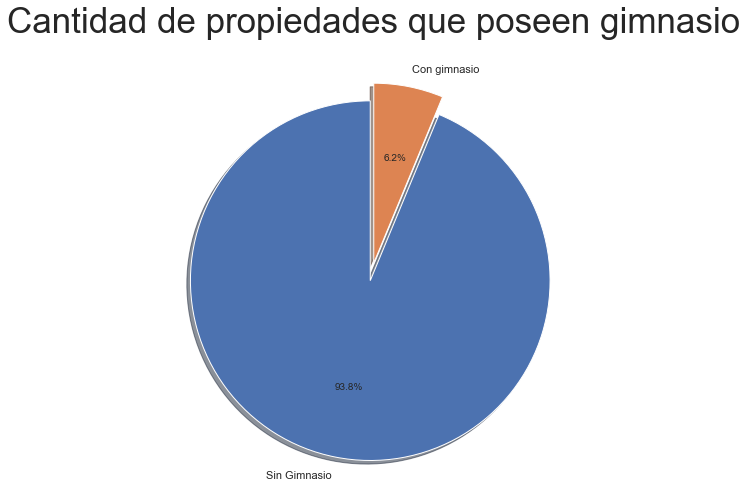

In [5]:
#Obtenemos las cantidades de propiedades con gimnasio
conGimnasio = (zonaprop[zonaprop['gimnasio'] == 1]).gimnasio.count()
sinGimnasio = (zonaprop[zonaprop['gimnasio'] == 0]).gimnasio.count()

sizes = [sinGimnasio, conGimnasio]
nombres = ['Sin Gimnasio','Con gimnasio']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Cantidad de propiedades que poseen gimnasio', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

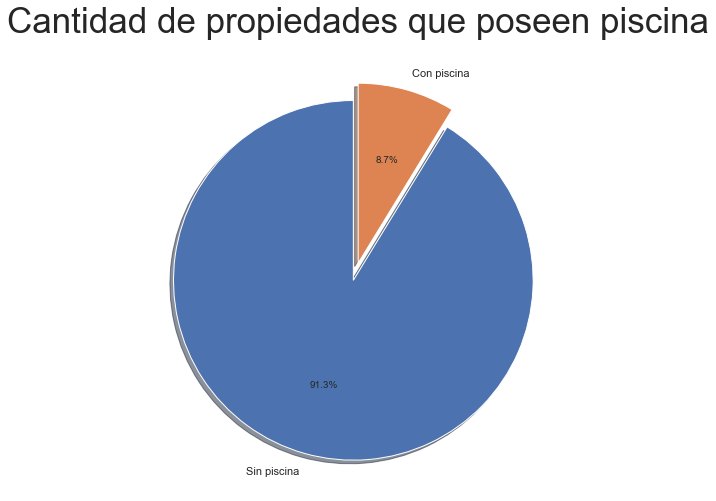

In [6]:
#Obtenemos las cantidades de propiedades con piscina
conPiscina = (zonaprop[zonaprop['piscina'] == 1]).gimnasio.count()
sinPiscina = (zonaprop[zonaprop['piscina'] == 0]).gimnasio.count()

sizes = [sinPiscina, conPiscina]
nombres = ['Sin piscina','Con piscina']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Cantidad de propiedades que poseen piscina', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

In [7]:
zonaprop['habitaciones'].value_counts()

3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

Text(0, 0.5, 'Cantidad de propiedades')

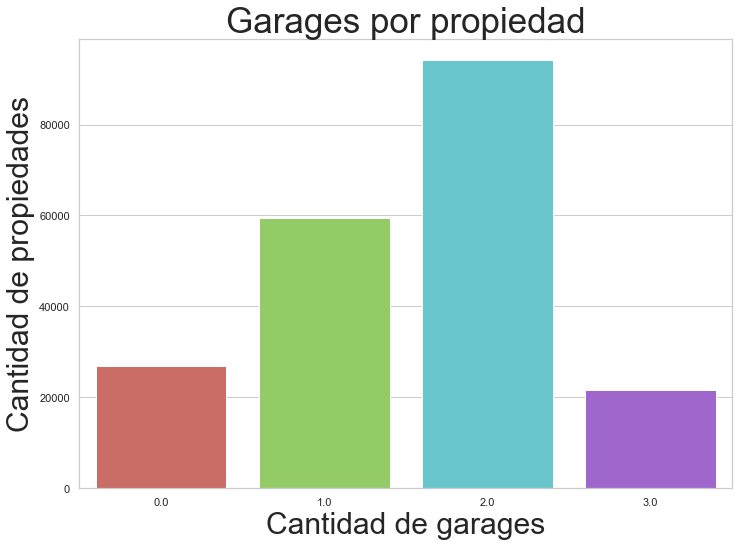

In [8]:
## GRAFICAMOS LA CANTIDAD DE GARAGES QUE TIENEN LAS PROPIEDADES.
#zonaprop['garages'].value_counts()
#2.0    94167
#1.0    59464
#0.0    26926
#3.0    21678

cantidad_de_garages_por_propiedad = list([0, 1, 2, 3])
garagesdf = zonaprop[zonaprop['garages'].isin(cantidad_de_garages_por_propiedad)]
garagesdf['garages'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="garages", data=garagesdf, palette="hls")
g.set_title("Garages por propiedad", fontsize=35)
g.set_xlabel("Cantidad de garages", fontsize=30)
g.set_ylabel("Cantidad de propiedades", fontsize=30)

Text(0, 0.5, 'Cantidad de propiedades')

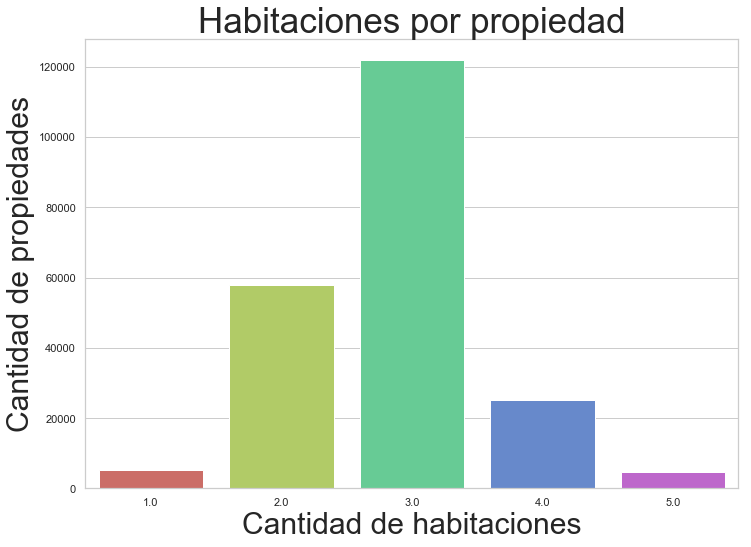

In [9]:
## GRAFICAMOS LA CANTIDAD DE HABITACIONES QUE TIENEN LAS PROPIEDADES.
#zonaprop['habitaciones'].value_counts()
#3.0     121887
#2.0      57808
#4.0      25068
#1.0       5069
#5.0       4596

cantidad_de_habitaciones_por_propiedad = list([0, 1, 2, 3, 4, 5])
habitacionesdf = zonaprop[zonaprop['habitaciones'].isin(cantidad_de_habitaciones_por_propiedad)]
habitacionesdf['garages'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="habitaciones", data=habitacionesdf, palette="hls")
g.set_title("Habitaciones por propiedad", fontsize=35)
g.set_xlabel("Cantidad de habitaciones", fontsize=30)
g.set_ylabel("Cantidad de propiedades", fontsize=30)

In [9]:
zonaprop['ciudad'].value_counts()

Querétaro                        12646
Benito Juárez                    11014
Zapopan                          10360
San Luis Potosí                   7925
Mérida                            7162
Monterrey                         6946
Alvaro Obregón                    6633
Cuauhtémoc                        6614
Naucalpan de Juárez               6554
Miguel Hidalgo                    5795
Atizapán de Zaragoza              5783
Tlalpan                           5721
Huixquilucan                      5718
Coyoacán                          5293
Puebla                            4636
Guadalajara                       4006
San Andrés Cholula                3805
Cancún                            3779
Cuernavaca                        3775
Chihuahua                         3757
Tlalnepantla de Baz               3588
Cuautitlán Izcalli                3408
Tlajomulco de Zúñiga              3254
Gustavo A. Madero                 3141
Iztapalapa                        3093
Cuajimalpa de Morelos    

Text(0, 0.5, 'Cantidad de propiedades')

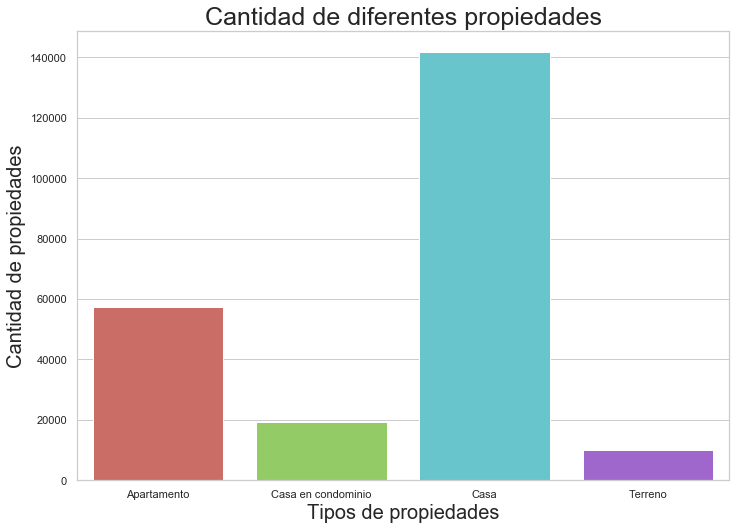

In [13]:
## GRAFICAMOS LOS DISTINTOS TIPOS DE PROPIEDADES.
#zonaprop['tipodepropiedad'].value_counts()
#Casa                             141717
#Apartamento                       57341
#Casa en condominio                19297
#Terreno                            9945
#Local Comercial                    3055
#Oficina comercial                  1741
#Bodega comercial                   1406
#Edificio                           1396
#Terreno comercial                  1326

tiposDePropiedad = list(["Casa", "Apartamento", "Casa en condominio", "Terreno"])
tiposDePropiedadf = zonaprop[zonaprop['tipodepropiedad'].isin(tiposDePropiedad)]
tiposDePropiedadf['tipodepropiedad'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="tipodepropiedad", data=tiposDePropiedadf, palette="hls")
g.set_title("Cantidad de diferentes propiedades", fontsize=25)
g.set_xlabel("Tipos de propiedades", fontsize=20)
g.set_ylabel("Cantidad de propiedades", fontsize=20)

Text(0, 0.5, 'Precio')

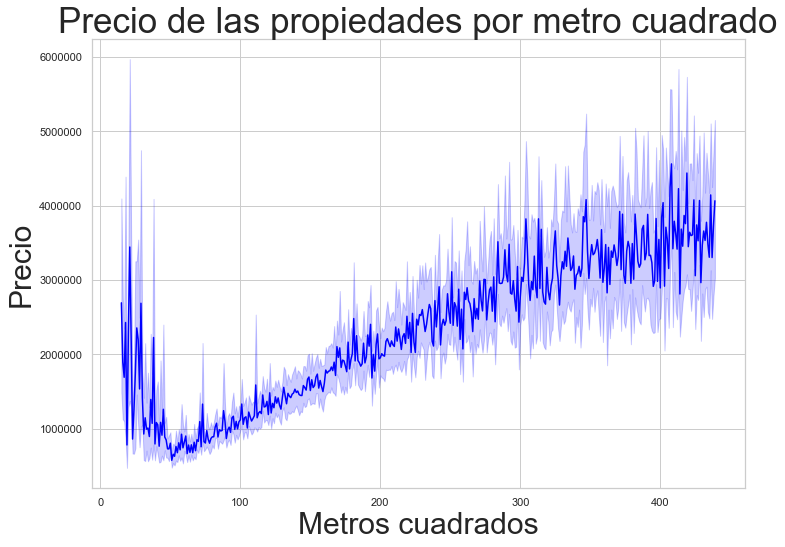

In [6]:
#Relacion metros cuadrados / precio promedio

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

metrosCuadrados_df = zonaprop.groupby(['provincia','metrostotales']).mean()[['precio']].reset_index()
sns.lineplot(x="metrostotales", y="precio", data=metrosCuadrados_df, color='blue')
ax = plt.gca()
ax.set_title("Precio de las propiedades por metro cuadrado", fontsize=35)
ax.set_xlabel("Metros cuadrados",fontsize=30)
ax.set_ylabel("Precio", fontsize=30)

Text(0, 0.5, 'Cantidad de metros cuadrados')

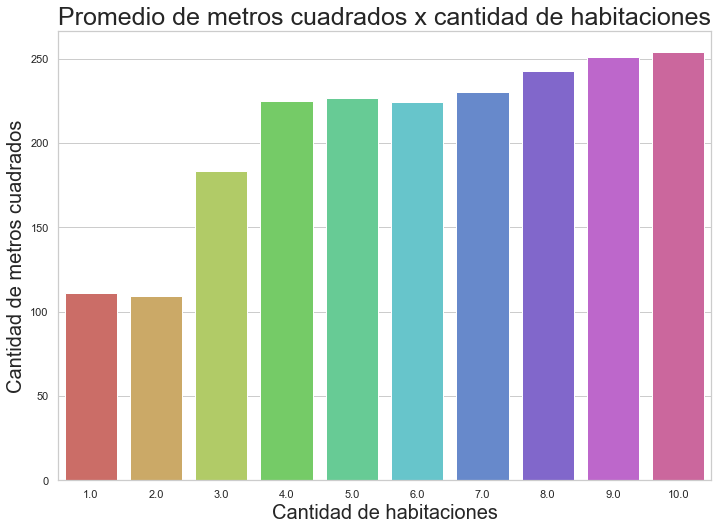

In [34]:
metrosCuadrados_df = zonaprop.groupby(['habitaciones']).mean()[['metrostotales']].reset_index()

# Tamaño para hojas A4.

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.barplot(x="habitaciones", y="metrostotales", data=metrosCuadrados_df, palette="hls")
g.set_title("Promedio de metros cuadrados x cantidad de habitaciones", fontsize=25)
g.set_xlabel("Cantidad de habitaciones", fontsize=20)
g.set_ylabel("Cantidad de metros cuadrados", fontsize=20)

In [10]:
zonaprop['ciudad'].value_counts()

Querétaro                        12646
Benito Juárez                    11014
Zapopan                          10360
San Luis Potosí                   7925
Mérida                            7162
Monterrey                         6946
Alvaro Obregón                    6633
Cuauhtémoc                        6614
Naucalpan de Juárez               6554
Miguel Hidalgo                    5795
Atizapán de Zaragoza              5783
Tlalpan                           5721
Huixquilucan                      5718
Coyoacán                          5293
Puebla                            4636
Guadalajara                       4006
San Andrés Cholula                3805
Cancún                            3779
Cuernavaca                        3775
Chihuahua                         3757
Tlalnepantla de Baz               3588
Cuautitlán Izcalli                3408
Tlajomulco de Zúñiga              3254
Gustavo A. Madero                 3141
Iztapalapa                        3093
Cuajimalpa de Morelos    

Text(0, 0.5, 'Precio')

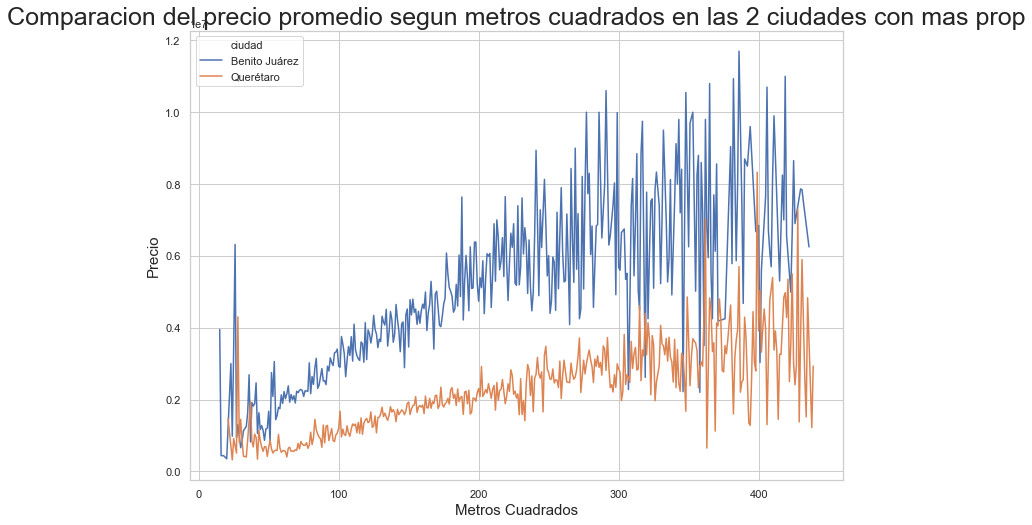

In [39]:
zonasMasPopulares = list(["Querétaro", "Benito Juárez"])
zonasPopulares = zonaprop[zonaprop['ciudad'].isin(zonasMasPopulares)]
zonasPopulares = zonasPopulares.groupby(['ciudad', 'metrostotales']).mean()[['precio']].reset_index()
zonasPopulares

#Relacion metros cuadrados / precio promedio en las 2 ciudades con mas propiedades publicadas

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.lineplot(x="metrostotales", y="precio", data=zonasPopulares, hue="ciudad", color='blue')
ax = plt.gca()
ax.set_title("Comparacion del precio promedio segun metros cuadrados en las 2 ciudades con mas prop", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio", fontsize=15)